* bin vector lengths
* look at varability of vector direction
  * calculate an angle for each vector (?)
  * look at surrounding vectors and compare 

* for each vector
  * calculate an angle ()

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('temp_UWRL_river_velocimetry_dataset.csv')

In [3]:
# df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
# df['angle'] = np.arctan2(df['v_y'], df['v_x'])
# df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['Unnamed: 0.1', 'Unnamed: 0', 'datetime', 'y', 'x', 'v_x', 'v_y',
       'v_len', 's2n', 'corr', 'sun_altitude', 'sun_azimuth',
       'spacial_location_3', 'spacial_location_5', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'angle_var'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,datetime,y,x,v_x,v_y,v_len,s2n,corr,...,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,angle_var
0,0,0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
1,1,1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
2,2,2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
3,3,3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
4,4,4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,9299131,9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1.452306,NaN
9299132,9299132,9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",2.175855,NaN
9299133,9299133,9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-0.484053,NaN
9299134,9299134,9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-2.431922,NaN


In [4]:
# df['angle_var'] = [np.nan for _ in range(len(df))]

In [5]:
# points = [
#     {'x': -0.13, 'y': -0.13},
#     {'x': -0.13, 'y': 0},
#     {'x': -0.13, 'y': 0.13},
#     {'x': 0, 'y': -0.13},
#     {'x': 0, 'y': 0.13},
#     {'x': 0.13, 'y': -0.13},
#     {'x': 0.13, 'y': 0},
#     {'x': 0.13, 'y': 0.13},
# ]

# dates = sorted(df.datetime.unique())

# for date in dates:
#     print(date)
#     df_curr = df[(df.datetime == date) & ~(df.angle.isna())]

#     for index, row in df_curr.iterrows():
#         xr, yr = round(row.x, 3), round(row.y, 3)
        
#         angles = []

#         for point in points:
#             angles.extend(df_curr.loc[(df_curr.x == xr + point['x'])&(df_curr.y == yr + point['y'])].angle.values)
        
#         if angles != []:
#             angle_diffs = []
#             for angle in angles:
#                 diff = abs(angle - row.angle) % np.pi
#                 angle_diffs.append(diff * diff)
    
#             df.at[index, 'angle_var'] = sum(angle_diffs) / len(angle_diffs)


In [6]:
df2 = df[~(df.angle_var.isna())]

In [7]:
df2[['v_x', 'v_len', 'angle', 'angle_var']]

,v_x,v_len,angle,angle_var
159557,-0.000080,0.000080,3.141593,0.000000
159558,0.000000,0.000000,0.000000,0.000000
159559,0.000000,0.000000,0.000000,0.006857
159560,0.001360,0.001369,-0.117109,0.013714
159561,-0.033760,0.033951,3.035359,0.395900
...,...,...,...,...
8170772,0.002339,0.007933,1.271550,0.139303
8170773,-0.003710,0.016550,1.796865,0.275956
8170774,0.027680,0.028726,-0.270649,1.790845
8170775,-0.000968,0.025422,-1.608873,4.017852


<Axes: xlabel='v_len', ylabel='angle_var'>

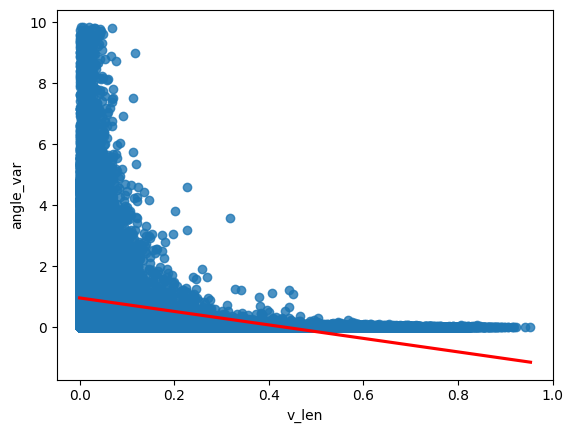

In [8]:
sns.regplot(
    data=df2,
    x='v_len',
    y='angle_var',
    line_kws={'color': 'red'}
)

<Axes: xlabel='v_len', ylabel='angle_var'>

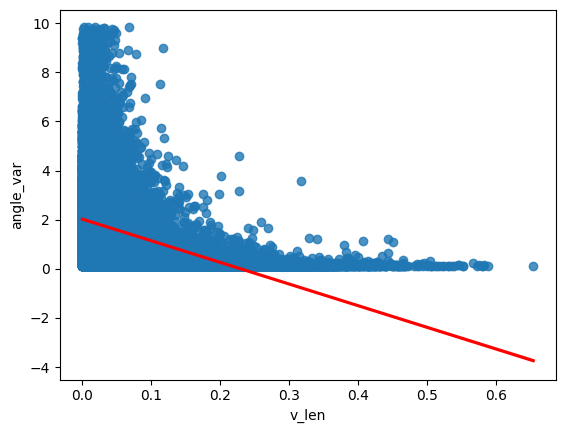

In [9]:
sns.regplot(
    data=df2[df2.angle_var > .1],
    x='v_len',
    y='angle_var',
    line_kws={'color': 'red'}
)

<Axes: xlabel='angle_var', ylabel='Count'>

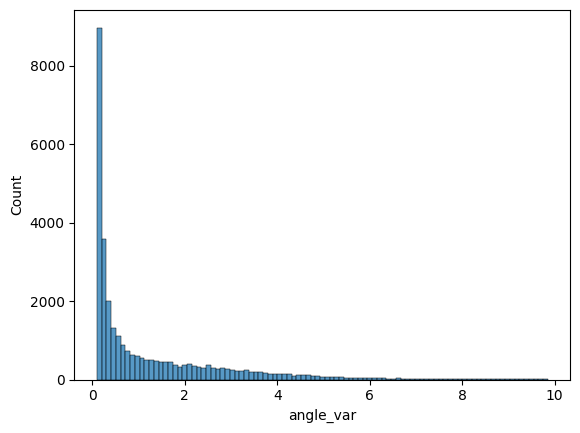

In [10]:
sns.histplot(
    data=df2[df2.angle_var > .1],
    x='angle_var'
)

<Axes: xlabel='v_len', ylabel='angle_var'>

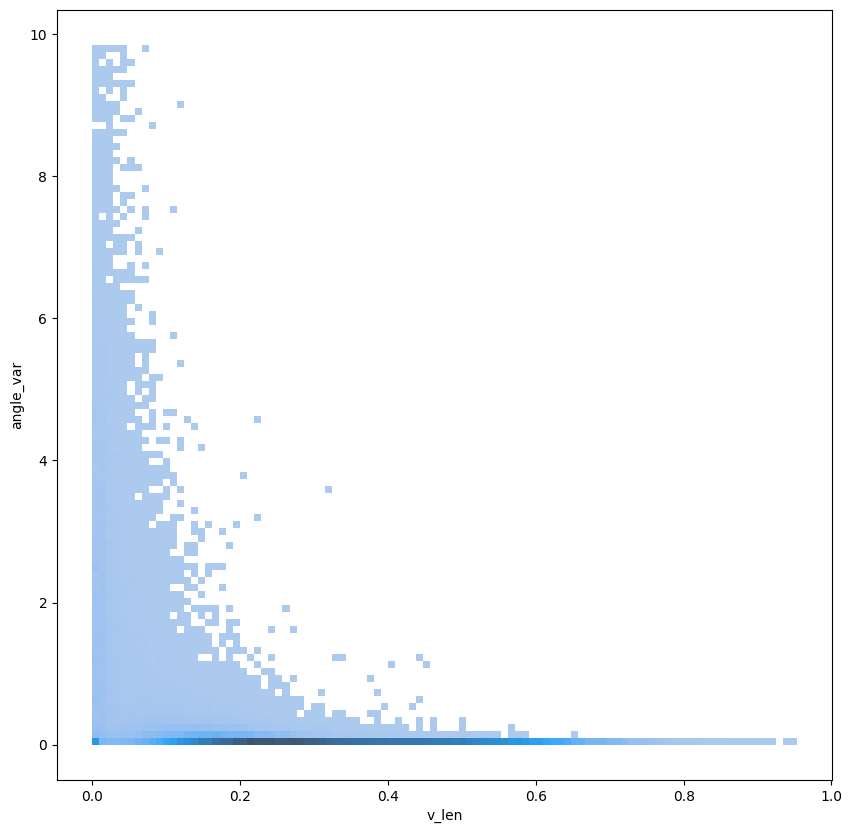

In [11]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2,
    x='v_len',
    y='angle_var',
    bins=100
)

<Axes: xlabel='v_x', ylabel='angle_var'>

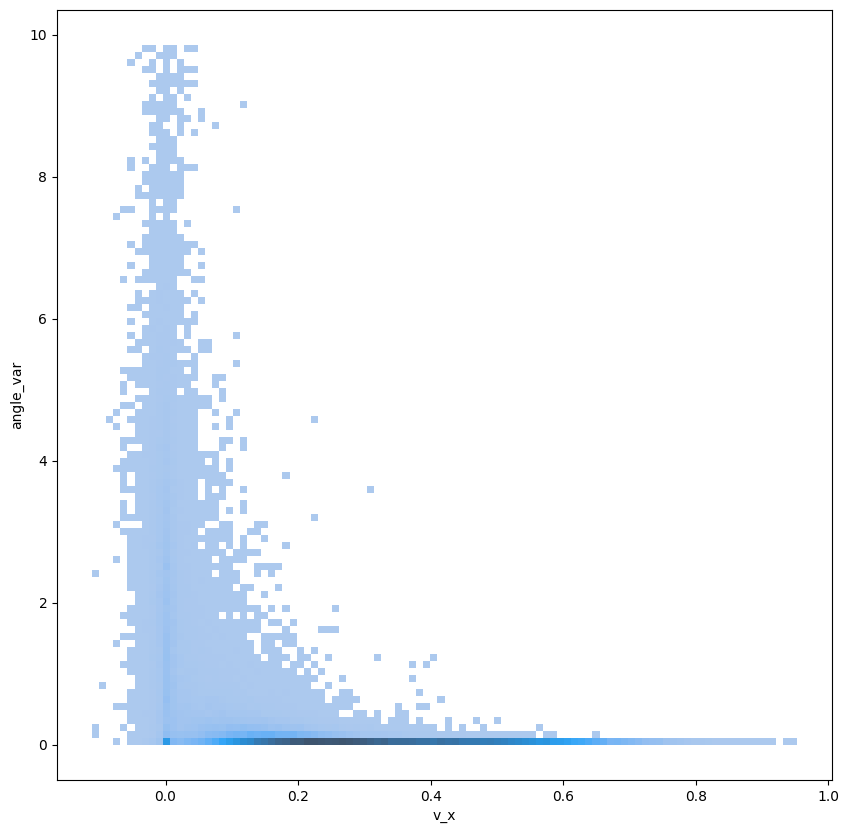

In [12]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2, # [df2.v_len >= 0.1],
    x='v_x',
    y='angle_var',
    bins=100
)

<Axes: xlabel='v_len', ylabel='angle_var'>

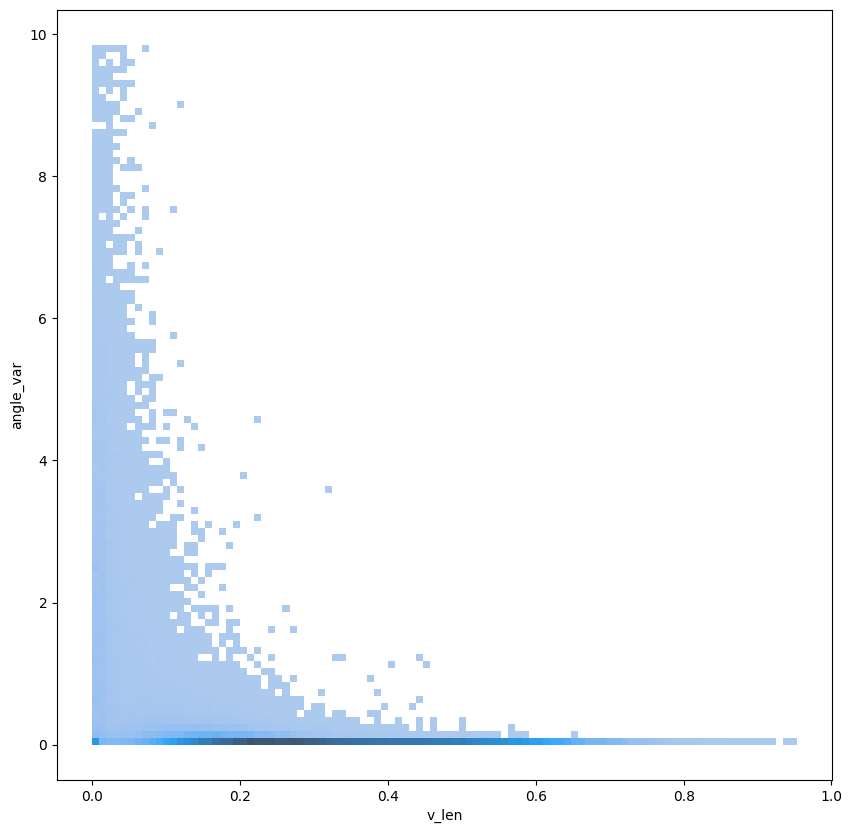

In [13]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[df2.cloudcover == 0],
    x='v_len',
    y='angle_var',
    bins=100
)